In [26]:
import pandas as pd
import sklearn

In [29]:
test = pd.read_csv("C:/Users/nagakeerthi.akkineni/Downloads/hackweek2.csv")


In [30]:
test.head(10)

,Unnamed: 0,index,VERBATIM,COMBINED_CATEGORY_ID_1,SENTIMENT_ID_1,NPS_SCORE,VERBATIM_UUID,CATEGORY,SUB_CATEGORY,COMBINED_LABEL,SENTIMENT_LABEL,MAPPED_CATEGORY
0,0,0,"Great sound, all the availability of music fil...",13.0,0.0,10,f291e2ef-cacb-412c-83ce-97a239b38e73,Partner Integrations,NaN,Partner Integrations,Positive,Partner Integrations
1,1,3,"Remote would be nice, better than constantly u...",5.0,2.0,8,c6f9a10f-eb06-4677-9950-5a00fc5364eb,Customer Expectations,Feature Request,Customer Expectations Feature Request,Mixed,Customer Expectations
2,2,4,My only problems are the app can be confusing....,14.0,1.0,7,63bceb46-f437-4245-bcc5-699960b01563,Price,NaN,Price,Negative,Price
3,3,5,Great product! Love the set up experience and ...,26.0,0.0,10,950daf1a-9f02-4436-9a51-864701bd8359,Not Useful,NaN,Not Useful,Positive,Not Useful
4,4,6,I dislike that anyone on my network can hijack...,27.0,1.0,10,abe92aa3-87bb-4bf2-bf3a-935d3627b347,Other,NaN,Other,Negative,Other
5,5,7,"Excellent, quality product, great sound and se...",13.0,0.0,10,16e9b4fe-7652-4039-8d5b-eec4f333cd7b,Partner Integrations,NaN,Partner Integrations,Positive,Partner Integrations
6,6,10,"I am enthusiastic about the sound, but unfortu...",16.0,2.0,5,630c3226-4138-4c1d-9210-25bc5e3ee8fa,System,Connectivity,System Connectivity,Mixed,System
7,7,11,DTS support is missing. \n Temporary dropouts.,8.0,1.0,5,1b041aef-f271-4f1a-8905-cbb86387f9f6,Customer Expectations,On This iOS Device,Customer Expectations On This iOS Device,Negative,Customer Expectations
8,8,16,"Expensive sound system, which cannot be used p...",7.0,1.0,1,2d2ec4b7-99f0-4fe3-8d33-eea28bc32eac,Customer Expectations,Lifecycle,Customer Expectations Lifecycle,Negative,Customer Expectations
9,9,20,Recently purchased 1 one SL and the sound is s...,3.0,0.0,10,83cf0377-a3cb-48d3-a06a-5af55d5ce1f8,Audio,Quality,Audio Quality,Positive,Audio


In [82]:
unlabelled_verbatims = unlab['VERBATIM']

In [83]:
# Roll-up hardware, setup, CX, HT into 'Other_Grain'
mapping_dict = {'Hardware': 'Other',
               'Home Theater': 'Other',
               'Setup': 'Other',
               'Customer Experience (Care)': 'Other',
               'Price': 'Price',
               'Partner Integrations': 'Partner Integrations',
               'Audio': 'Audio',
               'App': 'App',
               'Customer Expectations': 'Customer Expectations',
               'Not Useful': 'Not Useful',
               'System': 'System',
               'Voice': 'Voice',
               'Other': 'Other',
               'Updates': 'Updates'}

def map_categories(df, mapping_dict, mapping_key='CATEGORY'):
    """
    Map categories to other names/categories if necessary.
    """
    df[f"MAPPED_{mapping_key}"] = df[mapping_key].map(mapping_dict)
    return df

In [84]:
lab = map_categories(lab, mapping_dict)
verbatim_list = lab['VERBATIM']
category_list = lab['MAPPED_CATEGORY']
sub_category_list = lab['SUB_CATEGORY']
sentiment_list = lab['SENTIMENT_ID_1']
combined_category_list = lab['COMBINED_LABEL']
mapped_categories = list(set([x for x in mapping_dict.values()]))

In [85]:
# Import current corpus of verbatims
# Split out labelled and unlabelled comments into separate dfs
orig_import2 = pd.read_csv('C:/Users/nagakeerthi.akkineni/Downloads/unlab.csv')
lab2 = orig_import2[orig_import2['COMBINED_CATEGORY_ID_1'].notnull()].reset_index()
lab2['CATEGORY'].fillna(value='', inplace=True)
lab2['SUB_CATEGORY'].fillna(value='', inplace=True)
unlab2 = orig_import[orig_import2['COMBINED_CATEGORY_ID_1'].isnull()].reset_index()
lab2['COMBINED_LABEL'] = lab2['CATEGORY'] + ' ' + lab2['SUB_CATEGORY']

sent_mapping_dict = {0.0: 'Positive',
                     1.0: 'Negative',
                     2.0: 'Mixed',
                     3.0: 'Neutral'}
lab2 = map_categories(lab, sent_mapping_dict, 'SENTIMENT_ID_1')

lab2 = lab2.rename(columns={'MAPPED_SENTIMENT_ID_1': 'SENTIMENT_LABEL'})

lab2.to_csv('C:/Users/nagakeerthi.akkineni/Downloads/hackweek.csv')

In [20]:
test = pd.read_csv('C:/Users/nagakeerthi.akkineni/Downloads/hackweek.csv')

In [31]:
test.head(10)

,Unnamed: 0,index,VERBATIM,COMBINED_CATEGORY_ID_1,SENTIMENT_ID_1,NPS_SCORE,VERBATIM_UUID,CATEGORY,SUB_CATEGORY,COMBINED_LABEL,SENTIMENT_LABEL,MAPPED_CATEGORY
0,0,0,"Great sound, all the availability of music fil...",13.0,0.0,10,f291e2ef-cacb-412c-83ce-97a239b38e73,Partner Integrations,NaN,Partner Integrations,Positive,Partner Integrations
1,1,3,"Remote would be nice, better than constantly u...",5.0,2.0,8,c6f9a10f-eb06-4677-9950-5a00fc5364eb,Customer Expectations,Feature Request,Customer Expectations Feature Request,Mixed,Customer Expectations
2,2,4,My only problems are the app can be confusing....,14.0,1.0,7,63bceb46-f437-4245-bcc5-699960b01563,Price,NaN,Price,Negative,Price
3,3,5,Great product! Love the set up experience and ...,26.0,0.0,10,950daf1a-9f02-4436-9a51-864701bd8359,Not Useful,NaN,Not Useful,Positive,Not Useful
4,4,6,I dislike that anyone on my network can hijack...,27.0,1.0,10,abe92aa3-87bb-4bf2-bf3a-935d3627b347,Other,NaN,Other,Negative,Other
5,5,7,"Excellent, quality product, great sound and se...",13.0,0.0,10,16e9b4fe-7652-4039-8d5b-eec4f333cd7b,Partner Integrations,NaN,Partner Integrations,Positive,Partner Integrations
6,6,10,"I am enthusiastic about the sound, but unfortu...",16.0,2.0,5,630c3226-4138-4c1d-9210-25bc5e3ee8fa,System,Connectivity,System Connectivity,Mixed,System
7,7,11,DTS support is missing. \n Temporary dropouts.,8.0,1.0,5,1b041aef-f271-4f1a-8905-cbb86387f9f6,Customer Expectations,On This iOS Device,Customer Expectations On This iOS Device,Negative,Customer Expectations
8,8,16,"Expensive sound system, which cannot be used p...",7.0,1.0,1,2d2ec4b7-99f0-4fe3-8d33-eea28bc32eac,Customer Expectations,Lifecycle,Customer Expectations Lifecycle,Negative,Customer Expectations
9,9,20,Recently purchased 1 one SL and the sound is s...,3.0,0.0,10,83cf0377-a3cb-48d3-a06a-5af55d5ce1f8,Audio,Quality,Audio Quality,Positive,Audio


In [32]:
test.drop(columns = ['index','VERBATIM_UUID','CATEGORY','SUB_CATEGORY','COMBINED_LABEL','MAPPED_CATEGORY','NPS_SCORE','SENTIMENT_ID_1','COMBINED_CATEGORY_ID_1'],inplace = True)

In [33]:
import re
import string
def textclean(text):
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
cleaned1 = lambda x : textclean(x)

In [34]:
test['CleanedVerbatim']= pd.DataFrame(test.VERBATIM.apply(cleaned1))

In [35]:
test.head(10)

,Unnamed: 0,VERBATIM,SENTIMENT_LABEL,CleanedVerbatim
0,0,"Great sound, all the availability of music fil...",Positive,great sound all the availability of music file...
1,1,"Remote would be nice, better than constantly u...",Mixed,remote would be nice better than constantly us...
2,2,My only problems are the app can be confusing....,Negative,my only problems are the app can be confusing ...
3,3,Great product! Love the set up experience and ...,Positive,great product love the set up experience and s...
4,4,I dislike that anyone on my network can hijack...,Negative,i dislike that anyone on my network can hijack...
5,5,"Excellent, quality product, great sound and se...",Positive,excellent quality product great sound and seam...
6,6,"I am enthusiastic about the sound, but unfortu...",Mixed,i am enthusiastic about the sound but unfortun...
7,7,DTS support is missing. \n Temporary dropouts.,Negative,dts support is missing \n temporary dropouts
8,8,"Expensive sound system, which cannot be used p...",Negative,expensive sound system which cannot be used pe...
9,9,Recently purchased 1 one SL and the sound is s...,Positive,recently purchased one sl and the sound is so...


In [36]:
 # library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array 
# to append clean text  
corpus = []  
  
# 1000 (reviews) rows to clean 
for i in range(0, len(test)):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', test['CleanedVerbatim'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagakeerthi.akkineni\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


## Model Training

In [37]:
from sklearn.model_selection import train_test_split

Independent_var = test.CleanedVerbatim
Dependent_var = test.SENTIMENT_LABEL
IV_train,IV_test,DV_train,DV_test = train_test_split(Independent_var,Dependent_var,test_size = 0.1,random_state = 225)
print('IV_train: ',len(IV_train))
print('DV_train: ',len(DV_train))
print('IV_test: ',len(IV_test))
print('DV_test: ',len(DV_test))

IV_train:  4937
DV_train:  4937
IV_test:  549
DV_test:  549


# Logistic

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')
from sklearn.pipeline import Pipeline

In [39]:
model = Pipeline([('vectorizer', tvec),('classifier',clf2)])
model.fit(IV_train,DV_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions,DV_test)

array([[ 18,  11,   2,   1],
       [ 20, 184,  27,  17],
       [  0,   6,   5,   0],
       [ 21,  16,   4, 217]], dtype=int64)

In [40]:
# Predicting the Test set results --- Logistic

from sklearn.metrics import confusion_matrix
predictions1 = model.predict(IV_test)
confusion_matrix(predictions,DV_test)

array([[ 18,  11,   2,   1],
       [ 20, 184,  27,  17],
       [  0,   6,   5,   0],
       [ 21,  16,   4, 217]], dtype=int64)

# Random forest

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
 # library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array 
# to append clean text  
corpus = []  
  
# 1000 (reviews) rows to clean 
for i in range(0, len(test)):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', test['CleanedVerbatim'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagakeerthi.akkineni\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [43]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

  
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
clf1 = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
model1 = Pipeline([('vectorizer', vectorizer),('classifier',clf1)])
model1.fit(IV_train,DV_train)
  


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=N

In [44]:
# Predicting the Test set results 

from sklearn.metrics import confusion_matrix
predictions1 = model1.predict(IV_test)
confusion_matrix(predictions1,DV_test)


array([[ 13,   4,   1,   2],
       [ 26, 190,  27,  22],
       [  0,   2,   2,   0],
       [ 20,  21,   8, 211]], dtype=int64)

# MODEL pREDICTION

In [45]:
#Logistic Regression

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(predictions,DV_test))
print("Precision: ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall: ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy:  0.7723132969034608
Precision:  0.8374027184763463
Recall:  0.7723132969034608


In [46]:
#RandomForest

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(predictions1,DV_test))
print("Precision: ", precision_score(predictions1, DV_test, average = 'weighted'))
print("Recall: ", recall_score(predictions1, DV_test, average = 'weighted'))

Accuracy:  0.7577413479052824
Precision:  0.8562691516521492
Recall:  0.7577413479052824


In [76]:
a = ["I badly need another speaker, its awesome"]
result = model.predict(a)
print(result)

['Positive']


In [77]:
b = ["It's awful"]
result = model1.predict(a)
print(result)

['Positive']


In [51]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC


In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize  
stop_words = list(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagakeerthi.akkineni\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
def test_models(IV_train, 
                DV_train, 
                IV_test, 
                DV_test,
                classes,
                model_type='LinearSVC',
                feature_proc='tfidf',
                stop_words=None):
    
    if model_type == 'LinearSVC':
        m = (model_type, OneVsRestClassifier(LinearSVC()))
    elif model_type == 'RandomForest':
        m = (model_type, RandomForestClassifier(n_estimators=10))
    elif model_type == 'MultinomialNB':
        m = (model_type, MultinomialNB())
    elif model_type == 'LogisticRegression':
        m = (model_type, LogisticRegression(multi_class='ovr',
                                       solver='liblinear'))
                
    if feature_proc == 'tfidf':
        f = (feature_proc, TfidfVectorizer(stop_words=stop_words))
    elif feature_proc == 'count':
        f =  (feature_proc, CountVectorizer(stop_words=stop_words))
    elif feature_proc == 'hash':
        f = (feature_proc, HashingVectorizer(stop_words=stop_words, alternate_sign=False))
        
    if stop_words is None:
        s = None
    else:
        s = 'english'
        
    curr_pipeline = Pipeline([f, m])
    curr_pipeline.fit(x_train, y_train)
    
    y_pred = curr_pipeline.predict(x_test)
    
    clf_report = classification_report(y_pred, y_test, 
                                       output_dict=True, 
                                       zero_division=0)
    results_dict = {'model_name': model_type,
                    'feature_processing': feature_proc,
                    'stop_words': s,
                    'clf_report': clf_report,
                    'overall_accuracy': clf_report['accuracy'],
                    'macro_avg_precision': clf_report['macro avg']['precision'],
                    'macro_avg_recall': clf_report['macro avg']['recall'],
                    'macro_avg_f1': clf_report['macro avg']['f1-score'],
                    'weighted_avg_precision': clf_report['weighted avg']['precision'],
                    'weighted_avg_recall': clf_report['weighted avg']['recall'],
                    'weighted_avg_f1': clf_report['weighted avg']['f1-score']}
    return results_dict

feature_procs = ['tfidf', 'count']
list_of_models = ['RandomForest', 'LinearSVC', 'MultinomialNB', 'LogisticRegression']
stop_words_list = [None, stop_words]

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


In [56]:
# Stacking Classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier


estimators = [
    ('logreg1', make_pipeline(TfidfVectorizer(stop_words=stop_words),
                            LogisticRegression(multi_class='ovr', solver='liblinear'))),
    ('RandomForest', make_pipeline(TfidfVectorizer(stop_words=stop_words), 
                                   RandomForestClassifier(n_estimators=10))),
    ('MultiNB', make_pipeline(TfidfVectorizer(stop_words=stop_words),
                              MultinomialNB())),
    ('svc', make_pipeline(TfidfVectorizer(stop_words=stop_words),
                          OneVsRestClassifier(LinearSVC())))]
#     ('xgboost', make_pipeline(TfidfVectorizer(stop_words=stop_words),
#                               XGBClassifier()))]

cwa = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
cwa.fit(IV_train,DV_train)
y_pred_ens = cwa.predict(IV_test)
clf_report_ens = classification_report(y_pred_ens, DV_test, 
                                       output_dict=True, 
                                       zero_division=0)

C:\Users\nagakeerthi.akkineni\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
pd.DataFrame(clf_report_ens)

,Mixed,Negative,Neutral,Positive,accuracy,macro avg,weighted avg
precision,0.237288,0.857143,0.105263,0.910638,0.761384,0.527583,0.836493
recall,0.538462,0.735178,0.333333,0.829457,0.761384,0.609108,0.761384
f1-score,0.329412,0.791489,0.160000,0.868154,0.761384,0.537264,0.791831
support,26.000000,253.000000,12.000000,258.000000,0.761384,549.000000,549.000000


In [41]:
## Label Unlabelled Data for POC

In [58]:
from datetime import datetime, timedelta
dummy_dates = [datetime.now().date(), 
               datetime.now().date() - timedelta(days=1),
               datetime.now().date() - timedelta(days=2)]

In [59]:
# Predict on unlabelled data
predicted_dict = []

for en, ve in enumerate(unlabelled_verbatims):
    if en < 2303:
        curr['Dummy Date'] = dummy_dates[0]
    elif en > 2303 and en < 4606:
        curr['Dummy Date'] = dummy_dates[1]
    else:
        curr['Dummy Date'] = dummy_dates[2]    
    curr = {}
    curr_p = list(cwa.predict_proba([ve])[0])
    curr['Verbatim'] = ve
    curr['TopClass'] = cwa.classes_[np.argmax(curr_p)]
    for e, c in enumerate(cwa.classes_):
        curr[c] = curr_p[e]
    
    predicted_dict.append(curr)

NameError: name 'curr' is not defined

NameError: name 'disp' is not defined

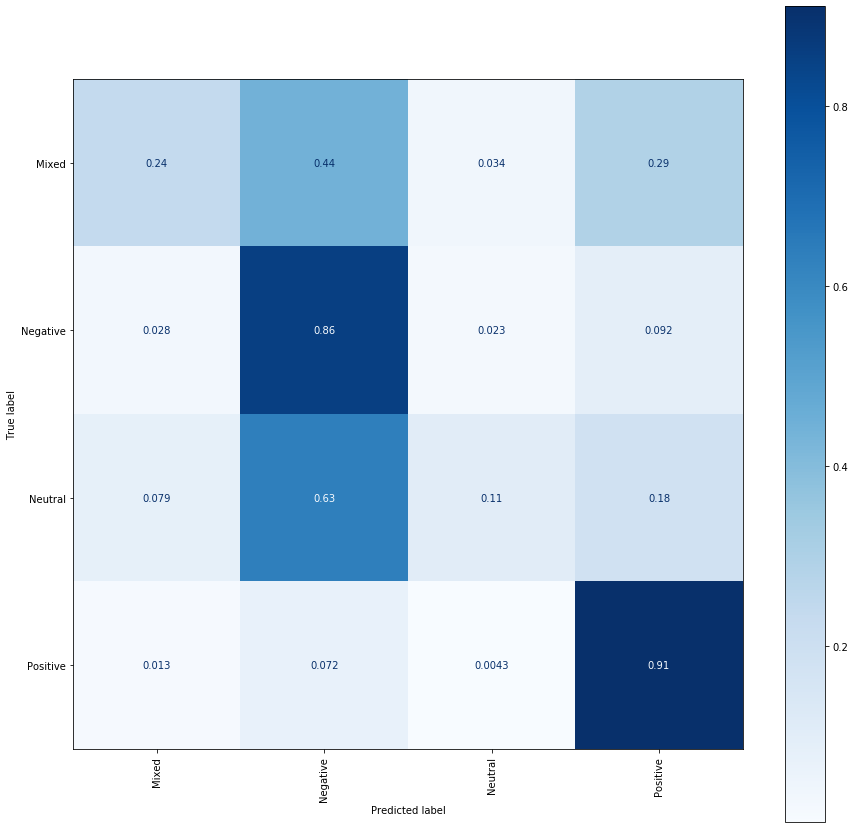

In [60]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(cwa, IV_test, DV_test, 
                      xticks_rotation='vertical',
                      normalize='true', cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title('Confusion Matrix, with Normalization')
plt.show()

In [61]:
## Explore multi-labeling, top-N accuracy, and exploring responses

In [62]:
pp = []
for c, v in enumerate(DV_test):
    curr_p = list(cwa.predict_proba([v])[0])
    zipped = list(zip(curr_p, cwa.classes_))
    pp.append((v, sorted(zipped, key=lambda x: x[0], reverse=True), 
               f"Predicted Class: {list(y_pred_ens)[c]}",
               f"True Class: {list(IV_test)[c]}"))

In [63]:
def top_n_accuracy(n, list_of_probs, y_true):
    in_top = 0
    for counter, p in enumerate(list_of_probs):
        if y_true[counter] in list(zip(*list_of_probs[counter][1]))[1][:n]:
            in_top += 1
            
    return in_top / len(y_true)

top_n_accuracy(2, pp, list(DV_test))

0.8925318761384335

In [64]:
import pprint
printer = pprint.PrettyPrinter(indent=2)
printer.pprint(pp[500:600])

[ ( 'Positive',
    [ (0.37425484042397206, 'Positive'),
      (0.2919839852633994, 'Negative'),
      (0.18295916288037092, 'Neutral'),
      (0.15080201143225763, 'Mixed')],
    'Predicted Class: Positive',
    'True Class: best home sound system ease of use  configuration options are '
    'endless combined with the brilliant app the sonos system is without '
    'equal'),
  ( 'Negative',
    [ (0.6393196276956098, 'Negative'),
      (0.22888030190635383, 'Mixed'),
      (0.11656990792536498, 'Neutral'),
      (0.015230162472671484, 'Positive')],
    'Predicted Class: Negative',
    'True Class: always find difficulty connecting bbc wales from my alexa'),
  ( 'Negative',
    [ (0.6393196276956098, 'Negative'),
      (0.22888030190635383, 'Mixed'),
      (0.11656990792536498, 'Neutral'),
      (0.015230162472671484, 'Positive')],
    'Predicted Class: Negative',
    'True Class: interaction with amazon music does not always work properly a '
    'selection of an artist with all album

In [65]:
# Peak at things labelled as system but not actually system...
for i in range(len(list(DV_test))):
    if list(DV_test)[i] != list(y_pred_ens)[i]:
        if list(y_pred_ens)[i] == 'System':
            print("\n", list(IV_test)[i], "\nTrue Label: ", list(DV_test)[i], "\nPredicted Label: ", y_pred_ens[i])
            

In [71]:
unlabelled_verbatims = unlab['VERBATIM']

In [74]:
# Import current corpus of verbatims
# Split out labelled and unlabelled comments into separate dfs
orig_import2 = pd.read_csv('C:/Users/nagakeerthi.akkineni/Downloads/unlab.csv')
lab2 = orig_import2[orig_import2['COMBINED_CATEGORY_ID_1'].notnull()].reset_index()
lab2['CATEGORY'].fillna(value='', inplace=True)
lab2['SUB_CATEGORY'].fillna(value='', inplace=True)
unlab2 = orig_import[orig_import2['COMBINED_CATEGORY_ID_1'].isnull()].reset_index()
lab2['COMBINED_LABEL'] = lab2['CATEGORY'] + ' ' + lab2['SUB_CATEGORY']

sent_mapping_dict = {0.0: 'Positive',
                     1.0: 'Negative',
                     2.0: 'Mixed',
                     3.0: 'Neutral'}
lab2 = map_categories(lab, sent_mapping_dict, 'SENTIMENT_ID_1')

lab2 = lab2.rename(columns={'MAPPED_SENTIMENT_ID_1': 'SENTIMENT_LABEL'})

lab2.to_csv('C:/Users/nagakeerthi.akkineni/Downloads/hackweek.csv')

In [75]:
test1 = pd.read_csv("C:/Users/nagakeerthi.akkineni/Downloads/hackweek.csv")

In [77]:
test1.head(5)

,Unnamed: 0,level_0,Unnamed: 0.1,index,VERBATIM,COMBINED_CATEGORY_ID_1,SENTIMENT_ID_1,NPS_SCORE,VERBATIM_UUID,CATEGORY,SUB_CATEGORY,COMBINED_LABEL,MAPPED_CATEGORY,SENTIMENT_LABEL
